In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
wineDF = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wineDF['target'] = wine.target
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# 데이터 군집화
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)


In [4]:
wineDF['PCA1'] = wine_pca[:,0]
wineDF['PCA2'] = wine_pca[:,1]

- 정규화 하지않고 군집화

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(wine.data)

KMeans(n_clusters=3)

In [8]:
wineDF['cluster_no_std'] = kmeans.labels_

In [9]:
clustering_result = wineDF.groupby(['target', 'cluster_no_std'])['alcohol'].count()
clustering_result

target  cluster_no_std
0       0                 13
        1                 46
1       0                 20
        1                  1
        2                 50
2       0                 29
        2                 19
Name: alcohol, dtype: int64

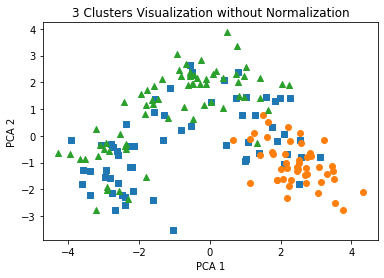

In [10]:
markers=['s', 'o', '^']

for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF.cluster_no_std == i]['PCA1']
    y_axis_data = wineDF[wineDF.cluster_no_std == i]['PCA2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization without Normalization')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_std)
wineDF['cluster_std'] = kmeans.labels_
clustering_result = wineDF.groupby(['target','cluster_std'])['alcohol'].count()
clustering_result

target  cluster_std
0       1              59
1       0               3
        1               3
        2              65
2       0              48
Name: alcohol, dtype: int64

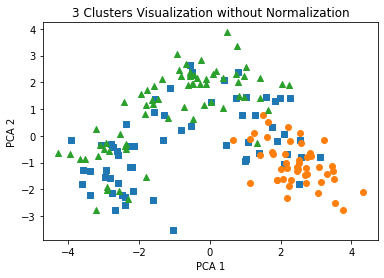

In [12]:
markers=['s', 'o', '^']

for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF.cluster_no_std == i]['PCA1']
    y_axis_data = wineDF[wineDF.cluster_no_std == i]['PCA2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization without Normalization')
plt.show()

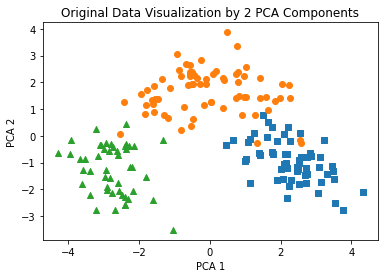

In [13]:
for i, marker in enumerate(markers):
    x_axis_data = wineDF[wineDF.target == i]['PCA1']
    y_axis_data = wineDF[wineDF.target == i]['PCA2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('Original Data Visualization by 2 PCA Components')
plt.show()

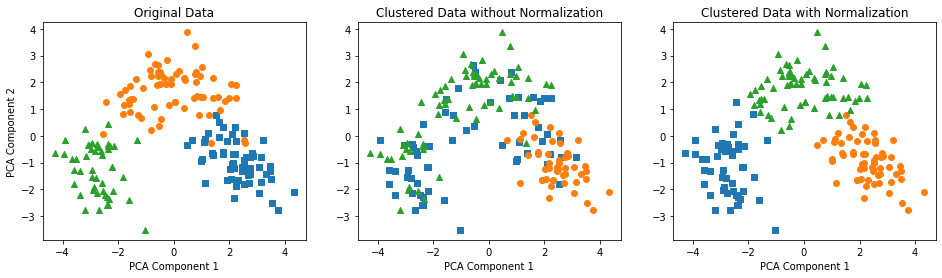

In [14]:
fig, axs = plt.subplots(figsize=(16,4), ncols=3, nrows=1)
column_dict = {
    'target':'Original Data', 
    'cluster_no_std':'Clustered Data without Normalization', 
    'cluster_std':'Clustered Data with Normalization'
}

for k, column in enumerate(column_dict.keys()):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = wineDF[wineDF[column] == i]['PCA1']
        y_axis_data = wineDF[wineDF[column] == i]['PCA2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker)

    ax.set_title(column_dict[column])
    if k == 0:
        ax.set_ylabel('PCA Component 2')
        ax.set_xlabel('PCA Component 1')

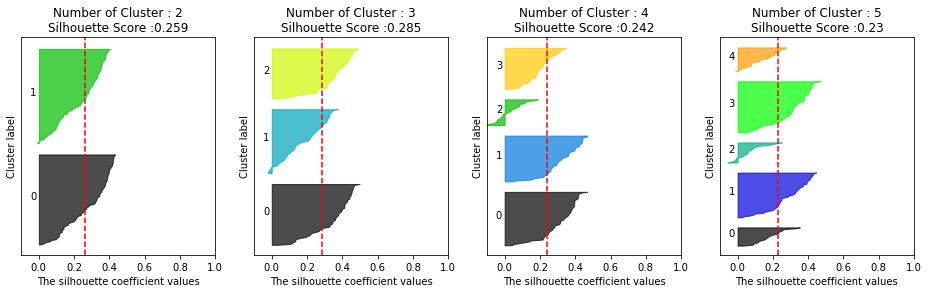

In [16]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], wine_std)